Episode 0


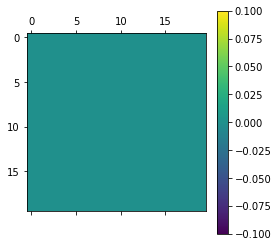

Episode 50


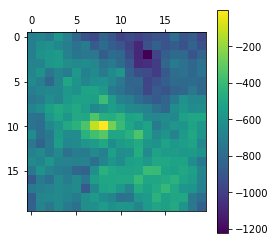

Episode 100


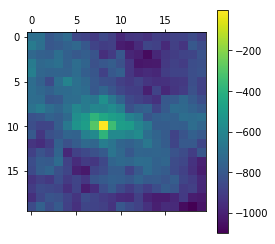

Episode 150


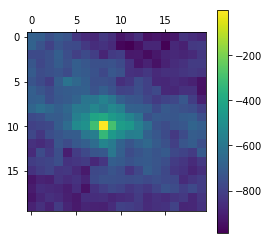

Episode 200


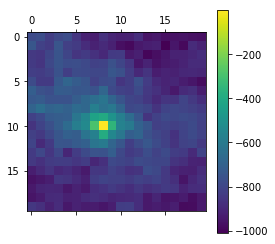

Episode 250


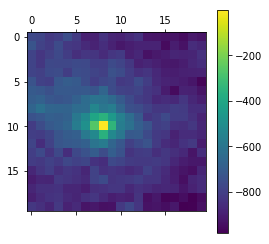

Episode 300


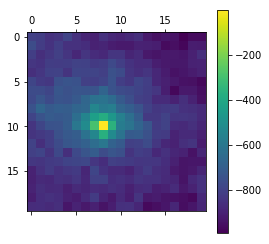

Episode 350


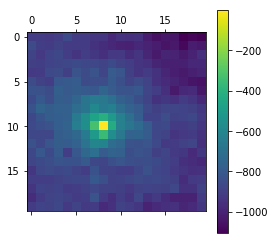

Episode 400


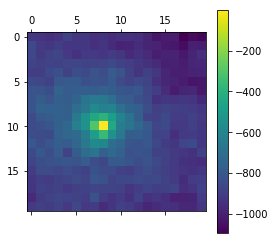

Episode 450


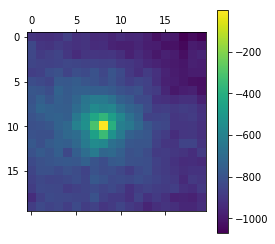

Episode 500


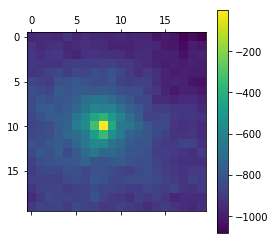

Episode 550


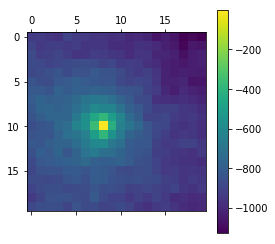

Episode 600


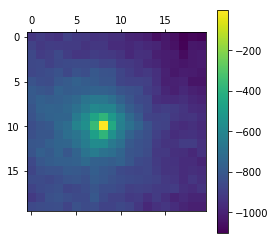

Episode 650


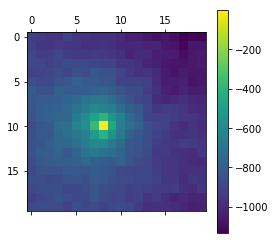

Episode 700


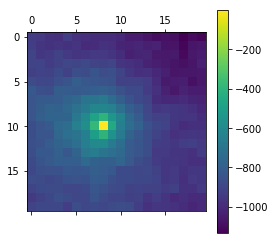

Episode 750


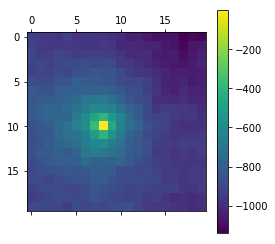

Episode 800


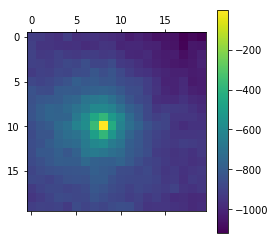

Episode 850


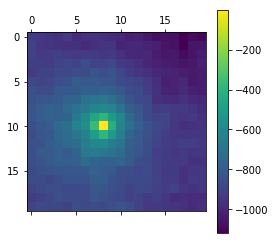

Episode 900


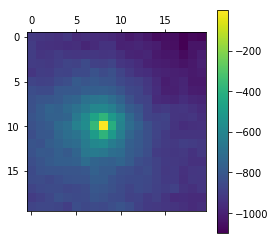

Episode 950


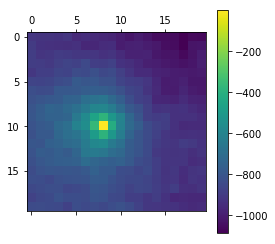

Episode 1000


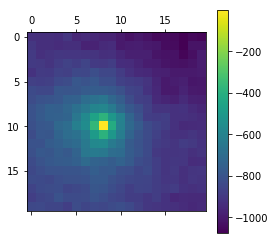

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from myelin.agents import FirstVisitMonteCarlo
from myelin.core import RLInteraction, MDPEnvironment
from myelin.mdps.gridworld import GridWorld
from myelin.policies import RandomPolicy
from myelin.utils import Callback

ROWS = 20
COLS = 20

mdp = GridWorld(ROWS, COLS)
env = MDPEnvironment(mdp)
policy = RandomPolicy(env.action_space)
vf = np.zeros((ROWS, COLS))
agent = FirstVisitMonteCarlo(env.action_space, policy, vf)


def show_value_function(vf):
    np.set_printoptions(precision=4, linewidth=200)
    plt.matshow(vf)
    plt.colorbar()
    plt.show()

    
class Monitor(Callback):
    def on_episode_begin(self, episode):
        if episode % 50 == 0:
            print('Episode {}'.format(episode))
            show_value_function(vf)

    def on_train_end(self, episode):
        print('Episode {}'.format(episode))
        show_value_function(vf)


RLInteraction(env, agent).train(1000, callbacks=[Monitor()])